#### Synopsis
On September 17th, 2016 I participated in a 
[5K run](http://www.runningguru.com/EventInformation.asp?eID=26299) at [Ascot Hills Park](https://nobodyhikesinla.com/2016/01/12/ascot-hills-park/), which true to its name hosts two large hills which the race traversed. 

According to [this tool](https://www.daftlogic.com/sandbox-google-maps-find-altitude.htm), the starting line altitude is:  
    
    34.07176160781663,-118.18867295980453, 492.225ft. 
    
And the two peaks are:   
    
    34.07656180268046,-118.19114863872528, 712.148ft
    41,34.07350155462652,-118.18668007850647, 715.088ft
    
Which puts the total altitude difference at 223ft.

The race committee released a [pdf of the race results](http://www.aztlanathletics.org/082014/results/2016/AHC2016/ascothillschallenge2016_overall_5k.pdf), which I then put through an [online pdf OCR translator](http://www.onlineocr.net), to get the data out of it. This was mostly done correctly with a few anomalies I had to fix by hand. 

Once complete, I saved the data out as a csv for importing via Pandas.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [36]:
# import previously cleaned csv file
df = pd.read_csv("001_ascothillschallenge2016_overall_5k_edit.csv")

In [37]:
df.head()

,Overall,Name,Bib No,Age,Gender,AG Place,Time,Pace,Time Back
0,1,DONOVAN ZAVALA,297,17.0,M,1 Top,18:37.8,5:59/M,NaN
1,2,STEVEN CELAYA,370,17.0,M,1 15-19,19:50.1,6:23/M,1:12.2
2,3,JOHN MARTINEZ,134,16.0,M,2 15-19,20:00.4,6:26/M,1:22.5
3,4,GILBERT SALAZAR,198,43.0,M,1 40-44,20:01.3,6:26/M,1:23.5
4,5,DUSTIN CHAN,363,16.0,M,3 15-19,20:12.7,6:30/M,1:34.9


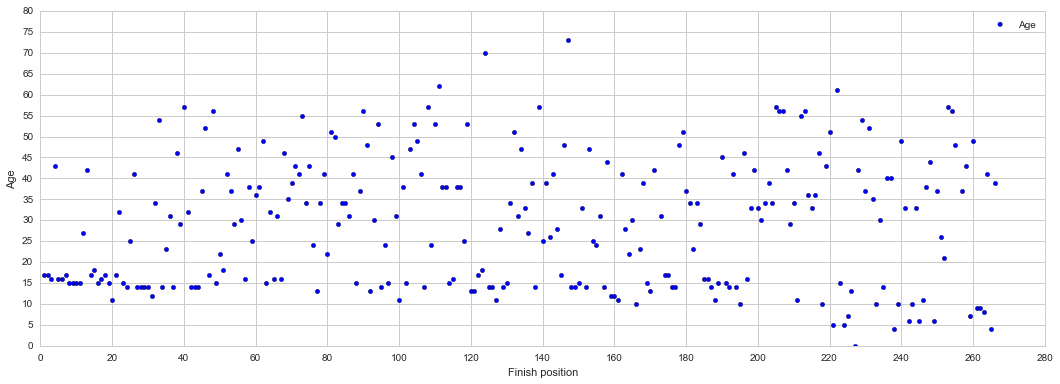

In [51]:
plt.figure(figsize=(18,6))
plt.scatter(df['Overall'], df['Age'])
plt.legend(loc="best")
plt.xlabel('Finish position')
plt.ylabel('Age')
plt.ylim(0,80)
plt.xlim(0,280)
plt.locator_params(nbins=20)
plt.show()

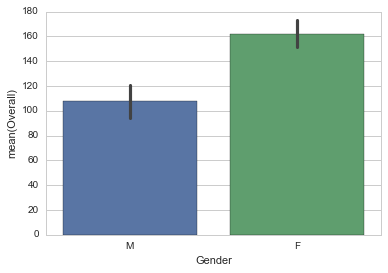

In [40]:
sb.barplot(x='Gender', y='Overall', data=df)
plt.show()

In [60]:
df.groupby('Gender')['Age'].mean()

Gender
F    29.354331
M    28.817518
Name: Age, dtype: float64

In [59]:
# df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.loc[df['Name'].str.contains('CHRISTOPHER')]

,Overall,Name,Bib No,Age,Gender,AG Place,Time,Pace,Time Back
61,62,CHRISTOPHER STACK,214,49.0,M,3 45-49,29:15.6,9:24/M,10:37.8


In [57]:
df.shape

(266, 9)